In [2]:
# load the nceccery libraries
import gzip
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#  load the data with pickel, train_data, test_data separated
def load_data():
    f = gzip.open('mnist.pkl.gz')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [4]:
training_data, validation_data, test_data = load_data()

In [5]:
training_data[0].shape

(50000, 784)

In [6]:
np.unique(training_data[1])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

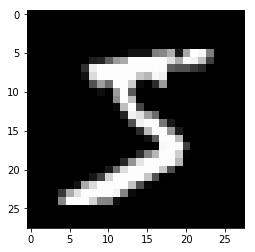

In [7]:
plt.figure()
plt.imshow(training_data[0][0].reshape(28, 28), cmap='gray')
plt.show()

In [8]:
print("trainging feature data::", str(training_data[0]))
print("training result data::", str(test_data[1]))
print("The number of examples in the training dataset is:" + str(len(training_data[0])))
print("The number of points in a single input is:" + str(len(training_data[0][1])))

trainging feature data:: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
training result data:: [7 2 1 ... 4 5 6]
The number of examples in the training dataset is:50000
The number of points in a single input is:784


In [9]:
# use one hot encoding to convert the data result
def one_hot(numbers):
    _size = numbers.shape[0]
    _array = np.zeros((10, _size))
    i = 0
    for res in numbers:
        _array[res][i] = 1.0
        i += 1
    return _array

In [10]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(data.shape)
one_hot(data)

(10,)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
# data_wrapper to read the data and convert desired output format 
# input to transpose 
# output to onehot encoding
def data_wrapper():
    tr_d, vd_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_set_y = one_hot(np.array(tr_d[1][:]))
    
    validation_inputs = np.array(vd_d[0]).T
    validation_set_y = one_hot(np.array(vd_d[1][:]))
    
    test_inputs = np.array(te_d[0][:]).T
    test_set_y = one_hot(np.array(te_d[1][:]))
    
    return(training_inputs, training_set_y, validation_inputs, validation_set_y, test_inputs, test_set_y)

In [12]:
training_set_x, training_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y = data_wrapper()

In [14]:
print ("train_set_x shape: " + str(training_set_x.shape))
print ("train_set_y shape: " + str(training_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


In [15]:
pd.DataFrame(training_set_y)

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FeedForward:

In [16]:
# activation functions: 
# Sigmoid
# relu
# softmax

#### Sigmoid function: 

In [17]:
def sigmoid(Z):
    H = 1 / (1 + np.exp(-Z))
    sigmoid_memory = Z
    return H, sigmoid_memory

In [18]:
Z = np.arange(8).reshape(4,2)
print("sigmoid(Z) = " + str(sigmoid(Z)))

sigmoid(Z) = (array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895]]), array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]]))


#### Relu Activation Function

In [19]:
def relu(Z):
    H = np.maximum(0, Z)
    sigmoid_memory = Z
    assert(H.shape == sigmoid_memory.shape)
    return H, sigmoid_memory

In [20]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


#### SoftMax 

In [21]:
def softmax(Z):
    z_exp = np.exp(Z)
    z_sum = np.sum(z_exp, axis=0, keepdims=True)
    H = z_exp / z_sum
    sigmoid_memory = Z
    return H, sigmoid_memory

In [22]:
Z = np.array([[11,19,10], [12, 21, 23]])
H, softmax_memory = softmax(Z)
print(H)
print(softmax_memory)

[[2.68941421e-01 1.19202922e-01 2.26032430e-06]
 [7.31058579e-01 8.80797078e-01 9.99997740e-01]]
[[11 19 10]
 [12 21 23]]


### initialize_parameters
Let's now create a function **`initialize_parameters`** which initializes the weights and biases of the various layers. One way to initialise is to set all the parameters to 0. This is not a considered a good strategy as all the neurons will behave the same way and it'll defeat the purpose of deep networks. Hence, we initialize the weights randomly to very small values but not zeros. The biases are initialized to 0. Note that the **`initialize_parameters`** function initializes the parameters for all the layers in one `for` loop. 

The inputs to this function is a list named `dimensions`. The length of the list is the number layers in the network + 1 (the plus one is for the input layer, rest are hidden + output). The first element of this list is the dimensionality or length of the input (784 for the MNIST dataset). The rest of the list contains the number of neurons in the corresponding (hidden and output) layers.

For example `dimensions = [784, 3, 7, 10]` specifies a network for the MNIST dataset with two hidden layers and a 10-dimensional softmax output.

Also, notice that the parameters are returned in a dictionary. This will help you in implementing the feedforward through the layer and the backprop throught the layer at once.

In [51]:
def initialize_parameters(dimensions):
    np.random.seed(2)
    parameters = {}
    L = len(dimensions)
    for l in range(1, L):
        parameters["W"+str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
        parameters["b"+str(l)] = np.zeros((dimensions[l], 1))
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))
        
    return parameters

In [52]:
dimensions  = [784, 3,7,10]
parameters = initialize_parameters(dimensions)
# parameters
print("W1 = " + str(parameters["W1"]) + "\n")
print("b1 = " + str(parameters["b1"]) + "\n")
print("W2 = " + str(parameters["W2"]) + "\n")
print("b2 = " + str(parameters["b2"]) + "\n")
print("W3 = " + str(parameters["W3"]) + "\n")
print("b3 = " + str(parameters["b3"]) + "\n")

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]

b1 = [[0.]
 [0.]
 [0.]]

W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]

b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

W3 = [[ 0.20406947 -0.04960206 -0.06131668 -0.17449682  0.01840741 -0.00795452
   0.12406296]
 [ 0.08625738 -0.01239074  0.05854764  0.19336815 -0.07322525 -0.039205
   0.07512152]
 [-0.05947453  0.04753173 -0.1083593   0.08228398  0.07047718 -0.05854343
  -0.12699409]
 [ 0.03255273  0.00457369 -0.13662463  0.10202692 -0.07310626  0.1496712
   0.13433165]
 [ 0.02566371  0.0734615  -0.14332651 

## layer_forward

The function **`layer_forward`** implements the forward propagation for a certain layer 'l'. It calculates the cumulative input into the layer **Z** and uses it to calculate the output of the layer **H**. It takes **H_prev, W, b and the activation function** as inputs and stores the **linear_memory, activation_memory** in the variable **memory** which will be used later in backpropagation. 

<br> You have to first calculate the **Z**(using the forward propagation equation), **linear_memory**(H_prev, W, b) and then calculate **H, activation_memory**(Z) by applying activation functions - **`sigmoid`**, **`relu`** and **`softmax`** on **Z**.

<br> Note that $$H^{L-1}$$ is referred here as H_prev. You might want to use _[np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)_ to carry out the matrix multiplication.

In [25]:
# forward_layer --> layer_forward
# write function to calculate the Hidden layer H and keep the memory of the output

In [26]:
def layer_forward(H_prev, W, b, activation = 'relu'):
    np.matmul(W, H_prev)
    Z = np.matmul(W, H_prev) + b
    linear_memory = (H_prev, W, b)
    if activation == 'relu':
        H, activation_memory = relu(Z)
    elif activation == 'softmax':
        H, activation_memory = softmax(Z)
    elif activation == 'sigmoid':
        H, activation_memory = sigmoid(Z)
    
    memory = (linear_memory, activation_memory)
    return H, memory

In [27]:
# verify
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

result = layer_forward(H_prev, W_sample, b_sample, activation="sigmoid")
print(result[0])
# print(result[1])

[[1.         1.         1.         1.         1.        ]
 [0.99908895 0.99330715 0.99999969 1.         0.99987661]
 [0.73105858 0.5        0.99330715 0.9999546  0.88079708]]


### L_layer_forward
**`L_layer_forward`** performs one forward pass through the whole network for all the training samples (note that we are feeding all training examples in one single batch). Use the **`layer_forward`** you have created above here to perform the feedforward for layers 1 to 'L-1' in the for loop with the activation **`relu`**. The last layer having a different activation **`softmax`** is calculated outside the loop. Notice that the **memory** is appended to **memories** for all the layers. These will be used in the backward order during backpropagation.

In [28]:
# L_layer_forward
# Use the loop to calculate the feed forward neaurla network weights using layer_forward

In [57]:
def L_layer_forward(X, parameters):
    memories = []
    H = X
    L = len(parameters) // 2
    for l in range(1, L):
        H_prev = H
        H, memory = layer_forward(H_prev, parameters["W"+str(l)], parameters["b"+str(l)], 'relu')
        memories.append(memory)
        
        
    HL, memory = layer_forward(H, parameters["W"+str(L)], parameters["b"+str(L)], 'softmax')
    memories.append(memory)
    assert(HL.shape == (10, X.shape[1]))
    return HL, memories

In [58]:
# verify
# X is (784, 10)
# parameters is a dict
# HL should be (10, 10)
x_sample = training_set_x[:, 10:20]
print(x_sample.shape)
HL = L_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.10106734 0.10045152 0.09927757 0.10216656 0.1       ]
 [0.10567625 0.10230873 0.10170271 0.11250099 0.1       ]
 [0.09824287 0.0992886  0.09967128 0.09609693 0.1       ]
 [0.10028288 0.10013048 0.09998149 0.10046076 0.1       ]
 [0.09883601 0.09953443 0.09931419 0.097355   0.1       ]
 [0.10668575 0.10270912 0.10180736 0.11483609 0.1       ]
 [0.09832513 0.09932275 0.09954792 0.09627089 0.1       ]
 [0.09747092 0.09896735 0.0995387  0.09447277 0.1       ]
 [0.09489069 0.09788255 0.09929998 0.08915178 0.1       ]
 [0.09852217 0.09940447 0.09985881 0.09668824 0.1       ]]


# Loss

### compute_loss
The next step is to compute the loss function after every forward pass to keep checking whether it is decreasing with training.<br> **`compute_loss`** here calculates the cross-entropy loss. You may want to use _[np.log()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)_, _[np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)_, _[np.multiply()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html)_ here. Do not forget that it is the average loss across all the data points in the batch. It takes the output of the last layer **HL** and the ground truth label **Y** as input and returns the **loss**.

In [59]:
def compute_loss(HL, Y):
    m = Y.shape[1]
    loss = np.sum((-1/m) *((Y * np.log(HL))))
    assert(loss.shape == ())
    return loss

In [60]:
np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = training_set_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334035


## Backward propagation: 

# Backpropagation
Let's now get to the next step - backpropagation. Let's start with sigmoid_backward.

### sigmoid-backward
You might remember that we had created **`sigmoid`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. Notice that it takes input **dH** and **sigmoid_memory** as input. **sigmoid_memory** is the **Z** which we had calculated during forward propagation. You use _[np.exp()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)_ here the following way.

In [33]:
def sigmoid_backward(dH, sigmoid_memory):
    z = sigmoid_memory
    H = 1/(1+np.exp(-z))
    dz = dH * H * (1-H)
    return dz


### relu-backward
You might remember that we had created **`relu`** function that calculated the activation for forward propagation. Now, we need the activation backward, which helps in calculating **dZ** from **dH**. Notice that it takes input **dH** and **relu_memory** as input. **relu_memory** is the **Z** which we calculated uring forward propagation. 

In [34]:
def relu_backward(dH, relu_memory):
    z = relu_memory
    dZ = np.array(dH, copy=True)
    dZ[ z<= 0 ] = 0
    return dZ

### layer_backward

**`layer_backward`** is a complimentary function of **`layer_forward`**. Like **`layer_forward`** calculates **H** using **W**, **H_prev** and **b**, **`layer_backward`** uses **dH** to calculate **dW**, **dH_prev** and **db**. You have already studied the formulae in backpropogation. To calculate **dZ**, use the **`sigmoid_backward`** and **`relu_backward`** function. You might need to use _[np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)_, _[np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)_ for the rest. Remember to choose the axis correctly in db. 

In [115]:
# Layer backward propagation for single layer

def layer_backward(dH, memory, activation = 'relu'):
    linear_memory, activation_memory = memory
    H_prev, W, b = linear_memory
    if activation == 'relu':
        dZ = relu_backward(dH, activation_memory)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dH, activation_memory)
        
    m = H_prev.shape[1]
    dW = (1./m)* (np.dot(dZ, H_prev.T))
    db = (1./m)* (np.sum(dZ, axis=1, keepdims=True))
    dH_prev = np.dot(W.T, dZ)
    return (dH_prev, dW, db)


In [116]:

H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = layer_forward(H_prev, W_sample, b_sample, activation="relu")
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = layer_backward(dH, memory, activation = 'relu')
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)

dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


### L_layer_backward

**`L_layer_backward`** performs backpropagation for the whole network. Recall that the backpropagation for the last layer, i.e. the softmax layer, is different from the rest, hence it is outside the reversed `for` loop. You need to use the function **`layer_backward`** here in the loop with the activation function as **`relu`**. 

In [126]:
# L_layer_backward for calucalting in loop backward propagationn and update weights
def L_layer_backward(HL, Y, memories):
    gradients = {}
    
    dZ = HL - Y
    m = HL.shape[1]
    
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory

    H_prev, W, b = linear_memory    
    dW = (1./m) * (np.matmul(dZ, H_prev.T))
    db = (1./m)* (np.sum(dZ, axis=1, keepdims=True))
    dH_prev = np.dot(W.T, dZ)
    
    L = len(memories)

    gradients["dH" + str(L-1)] = dH_prev
    gradients["dW" + str(L)] = dW
    gradients["db" + str(L)] = db
    
    for l in reversed(range(L-1)):
        dH_prev_tmp, dW_tmp, db_tmp = layer_backward(gradients["dH"+ str(l+1)], memories[l], 'relu')
        gradients["dH" + str(l)] = dH_prev_tmp
        gradients["dW" + str(l+1)] = dW_tmp
        gradients["db" + str(l+1)] = db_tmp

    return gradients

In [127]:
x_sample = training_set_x[:, 10:20]
y_sample = training_set_y[:, 10:20]

HL, memories = L_layer_forward(x_sample, parameters=parameters)
gradients  = L_layer_backward(HL, y_sample, memories)
print('dW3 is \n', gradients['dW3'])
print('db3 is \n', gradients['db3'])
print('dW2 is \n', gradients['dW2'])
print('db2 is \n', gradients['db2'])

dW3 is 
 [[ 0.02003701  0.0019043   0.01011729  0.0145757   0.00146444  0.00059863
   0.        ]
 [ 0.02154547  0.00203519  0.01085648  0.01567075  0.00156469  0.00060533
   0.        ]
 [-0.01718407 -0.00273711 -0.00499101 -0.00912135 -0.00207365  0.00059996
   0.        ]
 [-0.01141498 -0.00158622 -0.00607049 -0.00924709 -0.00119619  0.00060381
   0.        ]
 [ 0.01943173  0.0018421   0.00984543  0.01416368  0.00141676  0.00059682
   0.        ]
 [ 0.01045447  0.00063974  0.00637621  0.00863306  0.00050118  0.00060441
   0.        ]
 [-0.06338911 -0.00747251 -0.0242169  -0.03835708 -0.00581131  0.0006034
   0.        ]
 [ 0.01911373  0.001805    0.00703101  0.0120636   0.00138836 -0.00140535
   0.        ]
 [-0.01801603  0.0017357  -0.01489228 -0.02026076  0.00133528  0.00060264
   0.        ]
 [ 0.0194218   0.00183381  0.00594427  0.01187949  0.00141043 -0.00340965
   0.        ]]
db3 is 
 [[ 0.10031756]
 [ 0.00460183]
 [-0.00142942]
 [-0.0997827 ]
 [ 0.09872663]
 [ 0.00536378]
 [

## Update the parameters: 

In [133]:
# update parameters with the latest values 

def update_parameters(parameters, gradients, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate * gradients["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate * gradients["db"+str(l+1)]
    
    return parameters

In [134]:
dimensions = [784, 45, 10]

# Model

### L_layer_model

This is a composite function which takes the training data as input **X**, ground truth label **Y**, the **dimensions** as stated above, **learning_rate**, the number of iterations **num_iterations** and if you want to print the loss, **print_loss**. You need to use the final functions we have written for feedforward, computing the loss, backpropagation and updating the parameters.

In [147]:
# write the model which combine feedfoward, loss function and backward propagation
def L_layer_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    parameters = initialize_parameters(dimensions)
    losses = []
    np.random.seed(3)
    
    for l in range(num_iterations):
        HL, memories = L_layer_forward(X, parameters)
        loss = compute_loss(HL, Y)
        gradients = L_layer_backward(HL, Y, memories)
        parameters = update_parameters(parameters, gradients, learning_rate)
        if print_loss and l % 100 == 0:
            print ("Loss after iteration %i: %f" %(l, loss))
            losses.append(loss)
            
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()    
    return parameters

In [148]:
training_set_x_new = training_set_x[:,0:5000]
training_set_y_new = training_set_y[:,0:5000]
training_set_x_new.shape

(784, 5000)

Loss after iteration 0: 2.422624
Loss after iteration 100: 2.129232
Loss after iteration 200: 1.876095
Loss after iteration 300: 1.604213
Loss after iteration 400: 1.350205
Loss after iteration 500: 1.144823
Loss after iteration 600: 0.990554
Loss after iteration 700: 0.876603
Loss after iteration 800: 0.791154
Loss after iteration 900: 0.725441
Loss after iteration 1000: 0.673485
Loss after iteration 1100: 0.631386
Loss after iteration 1200: 0.596598
Loss after iteration 1300: 0.567342
Loss after iteration 1400: 0.542346
Loss after iteration 1500: 0.520746
Loss after iteration 1600: 0.501865
Loss after iteration 1700: 0.485205
Loss after iteration 1800: 0.470368
Loss after iteration 1900: 0.457054


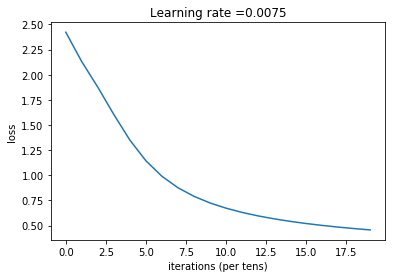

In [149]:
parameters = L_layer_model(training_set_x_new, training_set_y_new, dimensions, num_iterations = 2000, print_loss = True)

In [150]:
# write prediction function
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 
    probas, caches = L_layer_forward(X, parameters)

    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)

    print("Accuracy: "  + str(np.sum((p == act)/m)))
        
    return p

In [151]:
pred_train = predict(training_set_x_new, training_set_y_new, parameters)

Accuracy: 0.8774000000000002


In [152]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.8674000000000002


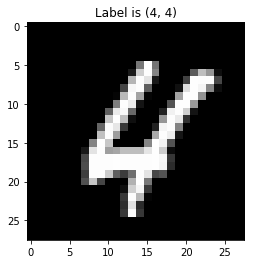

In [188]:
index  = np.random.randint(1, test_set_x.shape[1])
k = test_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(pred_test[index], np.argmax(test_set_y, axis = 0)[index])))
plt.imshow(k, cmap='gray')